# 利用 Python 解决回归问题

## 导入数据

In [2]:
import pandas as pd
import math
from IPython import display

df = pd.read_stata('game2_data.dta')

y = df['y']
x = df.drop(columns='y')

display.display(y.head())
display.display(x.head())

0    2.438777
1    0.629828
2   -3.428959
3   -1.320286
4    1.773177
Name: y, dtype: float32

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11
0,-9.163060,-1.588530,-0.802902,-3.990557,-0.802902,1.584558,-3.111471,-0.451257,2.154801,-5.849712,-1.384668
1,-1.438437,1.177610,-0.196004,0.446565,-0.196004,-1.218185,0.690861,-2.143279,0.121307,-0.341499,-0.467438
2,11.462125,2.887286,1.358113,3.876879,1.358113,-0.815247,2.638416,0.158565,-1.563668,4.190841,-0.548659
3,5.854400,-0.552525,1.233984,1.719736,1.233984,2.150350,0.896650,-0.827780,4.008009,1.085393,1.486160
4,-7.031788,-1.952549,-0.887858,-2.296057,-0.887858,-0.705950,0.054110,-0.355626,-2.779588,-1.299902,-0.291565


## Sklearn

### Lasso
- LassoCV
- Ridge

In [3]:
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def get_vars(coef):
    return [i + 1 for i,x in enumerate(coef.tolist()) if abs(x) > 0]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

data = []

print("Lasso====================")

clf = lm.Lasso(alpha=0.09, copy_X=True, fit_intercept=True, max_iter=1000,normalize=False, positive=False, precompute=False, random_state=None,selection='cyclic', tol=0.0001, warm_start=False)
clf.fit(x_train, y_train)
print(clf.score(x, y))
print(clf.coef_)

y_predict = clf.predict(x_test)
rmse = mean_squared_error(y_test, y_predict) ** 0.5
print("rmse:%.10f" % rmse)

data.append(['Lasso', clf.score(x_test,y_test), rmse, 0.1, get_vars(clf.coef_)])

print("LassoCV====================")
clf = lm.LassoCV(alphas=[0.5, 0.2, 0.1, 0.09], cv=5)
clf.fit(x, y)
print(clf.score(x, y))
print(clf.coef_)
print("choose alpha=%.10f" % clf.alpha_)
y_predict = clf.predict(x_test)
rmse = mean_squared_error(y_test, y_predict) ** 0.5
print("rmse:%.10f" % rmse)

data.append(['LassoCV', clf.score(x_test,y_test), rmse, clf.alpha_, get_vars(clf.coef_)])

print("Ridge====================")
clf = lm.Ridge(alpha=0.1)
clf.fit(x_train, y_train)
print(clf.score(x_test, y_test))
print(clf.coef_)
y_predict = clf.predict(x_test)
rmse = mean_squared_error(y_test, y_predict) ** 0.5
print("rmse:%.10f" % rmse)

data.append(['Ridge', clf.score(x_test,y_test), rmse, "", get_vars(clf.coef_)])

pd.DataFrame(data, columns=['Method', 'R^2', 'RMSE', 'Lambda', 'Coefficient'])

Lasso====================
0.9946700501294943
[-0.30531312  0.          0.          0.          0.          0.
 -0.         -0.00411733  0.04722745  0.01897528  0.00989574]
rmse:0.1847789031
LassoCV====================
0.9946772347480978
[-0.30537354  0.          0.          0.          0.          0.
 -0.         -0.0046635   0.04744116  0.01919822  0.00910188]
choose alpha=0.0900000000
rmse:0.1845967626
Ridge====================
0.9999999999963733
[-2.99999170e-01  3.32191089e-07 -7.33043954e-06  3.83274008e-07
 -7.33044120e-06 -9.99871236e-02 -9.99983999e-02 -9.99997006e-02
  9.99966680e-02  1.00000064e-01  9.99989065e-02]
rmse:0.0000047801


,Method,R^2,RMSE,Lambda,Coefficient
0,Lasso,0.994581,0.184779,0.1,"[1, 8, 9, 10, 11]"
1,LassoCV,0.994592,0.184597,0.09,"[1, 8, 9, 10, 11]"
2,Ridge,1.000000,0.000005,,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]"


## NetworkX 绘制变量间相关性图片

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


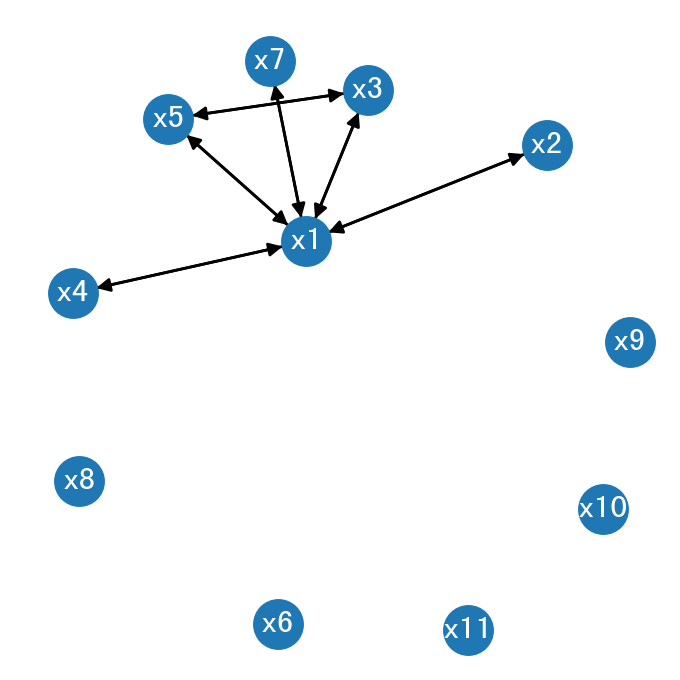

In [6]:
from matplotlib import pyplot as plt
import matplotlib as mpl

plt.rcParams['font.family']='sans-serif' 
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

import networkx as nx
dpi = 200
size = 640
fig = plt.figure(figsize=(size/dpi, size/dpi), dpi=dpi)


G = nx.DiGraph()

for i in range(1, 12):
    G.add_node('x' + str(i))

for i in range(1, 12):
    for j in range(1, 12):
        if(i != j):
            clf = lm.LinearRegression()
            xt = x['x' + str(i)].to_numpy().reshape(-1, 1)
            yt = x['x' + str(j)]
            clf.fit(xt, yt)
            score = clf.score(xt, yt)
            if(score > 0.8):
                G.add_edge('x' + str(i), 'x' + str(j))

pos = nx.spring_layout(G,k=1.5,scale=3)
nx.draw(G, pos, font_color='w', with_labels=True)
plt.show()

## 仅利用 `x1` 进行线性回归

In [5]:
clf = lm.LinearRegression()
xt = x_train[['x1']]
yt = y_train


clf.fit(x[['x1']],  y)
score = clf.score(xt, yt)
print(score)
print(clf.coef_)
y_predict = clf.predict(x_test[['x1']])
rmse = mean_squared_error(y_test, y_predict) ** 0.5
print("rmse:%.10f" % rmse)

0.9907975868718224
[-0.2978162]
rmse:0.2446448955
